# A Case study on how different countries develop

**Data Science Assignment**

Team Name : *DeepSeekerZ*

Group Members:
1) Chavda Haarit R. *(23110077)*
2) Darpana Desai *(23110085)*
3) Siddharth Rajandekar *(23110310)*

In [17]:
import pandas as pd
import numpy as np

In [ ]:
data_wdi = pd.read_csv('../datasets/WDICSV.csv')

In [19]:
print(data_wdi.head())

                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015       2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  17.488497  18.001597  18.558234   
1   NaN   NaN   NaN   NaN   NaN  ...   6.811504   7.096003   7.406706   
2   NaN   N

In [20]:
print(data_wdi.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [21]:
grp_countries = data_wdi.groupby('Country Name')
print(len(grp_countries))

266


In [22]:
indicators_filtered = [
                       'Research and development expenditure (% of GDP)',
                       'Renewable electricity output (% of total electricity output)',
                       'Life expectancy at birth, total (years)',
                        'GDP growth (annual %)',
                       'Forest area (% of land area)',
                       'Exports of goods and services (% of GDP)',
                       'Electric power consumption (kWh per capita)',
                       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)',
                       'Arable land (% of land area)',
                       'Age dependency ratio (% of working-age population)'
                       ]

countries_filtered = [
                        "United States",
                        "United Kingdom",
                        "Germany",
                        "China",
                        "India",
                        "Japan",
                        "Brazil",
                        "Indonesia",
                        "South Africa",
                        "Mexico",
                        "Niger",
                        "Chad",
                        "Haiti",
                        "Burundi"
                      ]

print(len(indicators_filtered))
print(len(countries_filtered))

10
14


In [23]:
data_wdi_filtered = data_wdi[data_wdi['Indicator Name'].isin(indicators_filtered) & data_wdi['Country Name'].isin(countries_filtered)]
print(data_wdi_filtered.shape)
print(data_wdi_filtered)
data_wdi_filtered.to_csv('data_wdi_filtered.csv', index=False)

(140, 68)
         Country Name Country Code  \
112256         Brazil          BRA   
112285         Brazil          BRA   
112329         Brazil          BRA   
112548         Brazil          BRA   
112596         Brazil          BRA   
...               ...          ...   
381941  United States          USA   
381953  United States          USA   
382185  United States          USA   
382695  United States          USA   
382702  United States          USA   

                                           Indicator Name     Indicator Code  \
112256  Age dependency ratio (% of working-age populat...        SP.POP.DPND   
112285                       Arable land (% of land area)     AG.LND.ARBL.ZS   
112329  Carbon dioxide (CO2) emissions (total) excludi...  EN.GHG.CO2.ZG.AR5   
112548        Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   
112596           Exports of goods and services (% of GDP)     NE.EXP.GNFS.ZS   
...                                                  

In [24]:
import pandas as pd
import pandas as pd
import plotly.express as px

def plot_data(indicator_name):

    df = pd.read_csv('data_wdi_filtered.csv')

    
    id_vars = ['Country Name', 'Indicator Name']
    value_vars = [col for col in df.columns[-24:] if col not in id_vars]

    df_long = df.melt(id_vars=id_vars, value_vars=value_vars,
                    var_name='Year', value_name='Value')

    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

    grouped = df_long.groupby('Indicator Name')

    data = grouped.get_group(indicator_name)
    
    
    fig = px.line(data,
                    x='Year',
                    y='Value',
                    color='Country Name',      
                    markers=True,
                    title=indicator_name)
        
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Value',
        legend_title='Country'
    )

    fig.show()
    del df_long,df

## Research and Development Expenditure:  
Hypothesis - Developed countries can generally afford to spend more money on R&D than underdeveloped and developing countries, who require funds for infrastructure. Over time, expense on R&D should increase to align with SDG 9: Industry, Innovation and Infrastructure.  
Observation - The top three countries spending on R&D are Japan, US, and Germany; all are developed. Least expenditure is from underdeveloped countries like Indonesia and Burundi. Over time, there is a slight increase in expense for all countries, except United Kingdom which has experienced a dramatic surge. 

In [25]:
plot_data(indicators_filtered[0])

## Renewable Electricity:  
Hypothesis - Developed countries generally have more sources and technology of renewable electricity than underdeveloped and developing countries, who depend primarily on fossil fuels for electricity. Over time, dependence on renewable electricity should increase to align with SDG 7: Affordable and Clean Energy.  
Observation - The leading countries in renewable electricity are Brazil and Burundi. Over time, there is a slight increase in renewable electricity output for most countries, except Haiti which has shown a significant decline.  

In [26]:
plot_data(indicators_filtered[1])

## Life Expectancy at Birth:  
Hypothesis - Developed countries generally have better healthcare facilities such as hospitals, doctors, and medical infrastructure compared to underdeveloped and developing countries, which often struggle with poor health systems. Over time, life expectancy should increase with improvements in healthcare to align with SDG 3: Good Health and Well Being.  
Observation - The top countries in life expectancy are Japan, UK, and Germany; all are developed. Over time, there is a slight increase in life expectancy for all countries, except Haiti which saw a sharp decline in 2010 due to the devastating earthquake. 

In [27]:
plot_data(indicators_filtered[2])

## GDP Growth:  
Hypothesis - GDP growth is generally stagnant in developed countries, highly increasing in developing countries, and slightly increasing in underdeveloped countries, with various fluctuations due to economic events. Over time, GDP growth should become similar for all countries to align with SDG 8: Decent work and Economic growth.  
Observation - GDP growth is fluctuating for almost all countries. There are two major periods of fluctuation—the 2008 economic crisis and the 2020 COVID pandemic—both causing a significant dip in GDP growth across almost all nations. Chad saw a dramatic increase in GDP growth during 2004 due to the Doba oil project and the completion of the Chad-Cameroon pipeline.

In [28]:
plot_data(indicators_filtered[3])

## Forest Area:  
Hypothesis - Developed countries generally focus more on infrastructure growth, which may lead to less forest area compared to developing and underdeveloped countries that still retain vast forest lands. Over time, forest area should increase to align with SDG 13: Climate Action and SDG 15: Life on Land.  
Observation - The top countries in forest area are Japan, Brazil, and Indonesia; all have massive rainforests like the Amazon or managed forests. Over time, there has been no increase in forest area for any country except Brazil and Indonesia which have seen a slight decrease due to widespread forest fires.  

In [29]:
plot_data(indicators_filtered[4])

## Exports of Goods and Services:  
Hypothesis - Developed countries are generally more advanced in trade and technology and earn more from exports compared to developing and underdeveloped nations that rely more on imports. Over time, exports should increase to align with SDG 9: Industry, Innovation and Infrastructure and SDG 8: Decent work and Economic growth.  
Observation - The top exporting nations are Germany, UK, and Chad. Over time, there are slight variations in exports across all nations.  

In [30]:
plot_data(indicators_filtered[5])

## Electric Power Consumption:  
Hypothesis - Developed nations tend to consume more electricity due to larger industrial bases compared to developing and underdeveloped nations that have fewer industries or lower populations resulting in less power usage. Over time, electric power consumption should increase to align with SDG 7: Affordable and Clean Energy.  
Observation - The top consumers of electric power are US, Japan, and Germany; all are developed nations. Over time, there has been little change in power consumption across most nations.  

In [31]:
plot_data(indicators_filtered[6])

## Carbon Dioxide Emissions:  
Hypothesis - Developed nations generally use more electricity and have larger industrial bases compared to developing or underdeveloped nations resulting in higher CO₂ emissions. Over time, CO₂ emissions should decrease to align with SDG 12: Responsible Consumption and Production and SDG 13: Climate Action.  
Observation - The country leading CO₂ emissions is Chad. Over time, CO₂ emissions have increased across all nations.  

In [32]:
plot_data(indicators_filtered[7])

## Arable Land:  
Hypothesis - Developed nations prioritize infrastructure growth over agriculture leading to reduced arable land compared to developing or underdeveloped nations that retain larger agricultural areas. Over time, arable land should increase to align with SDG 13: Climate Action and SDG 15: Life on Land.  
Observation - The top nations with arable land are India, Burundi, and Haiti. Over time, there has been no significant change in arable land for any country except Burundi which saw a considerable increase.

In [33]:
plot_data(indicators_filtered[8])

## Age Dependency Ratio:  
Hypothesis - Developed nations generally have lower age dependency ratios due to smaller older populations combined with higher employment among younger populations compared to underdeveloped or developing nations that rely heavily on working-age populations for support. Over time, age dependency ratios should decrease to align with SDG 10: Reduced Inequalities.    
Observation - The top nations with high age dependency ratios are Niger, Chad, and Burundi; all are underdeveloped nations. Over time, age dependency ratios have decreased across most nations except Japan where reductions in birth rates have led to an aging population.

In [34]:
plot_data(indicators_filtered[9])

## Correlation 

Index(['Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
(10, 24)


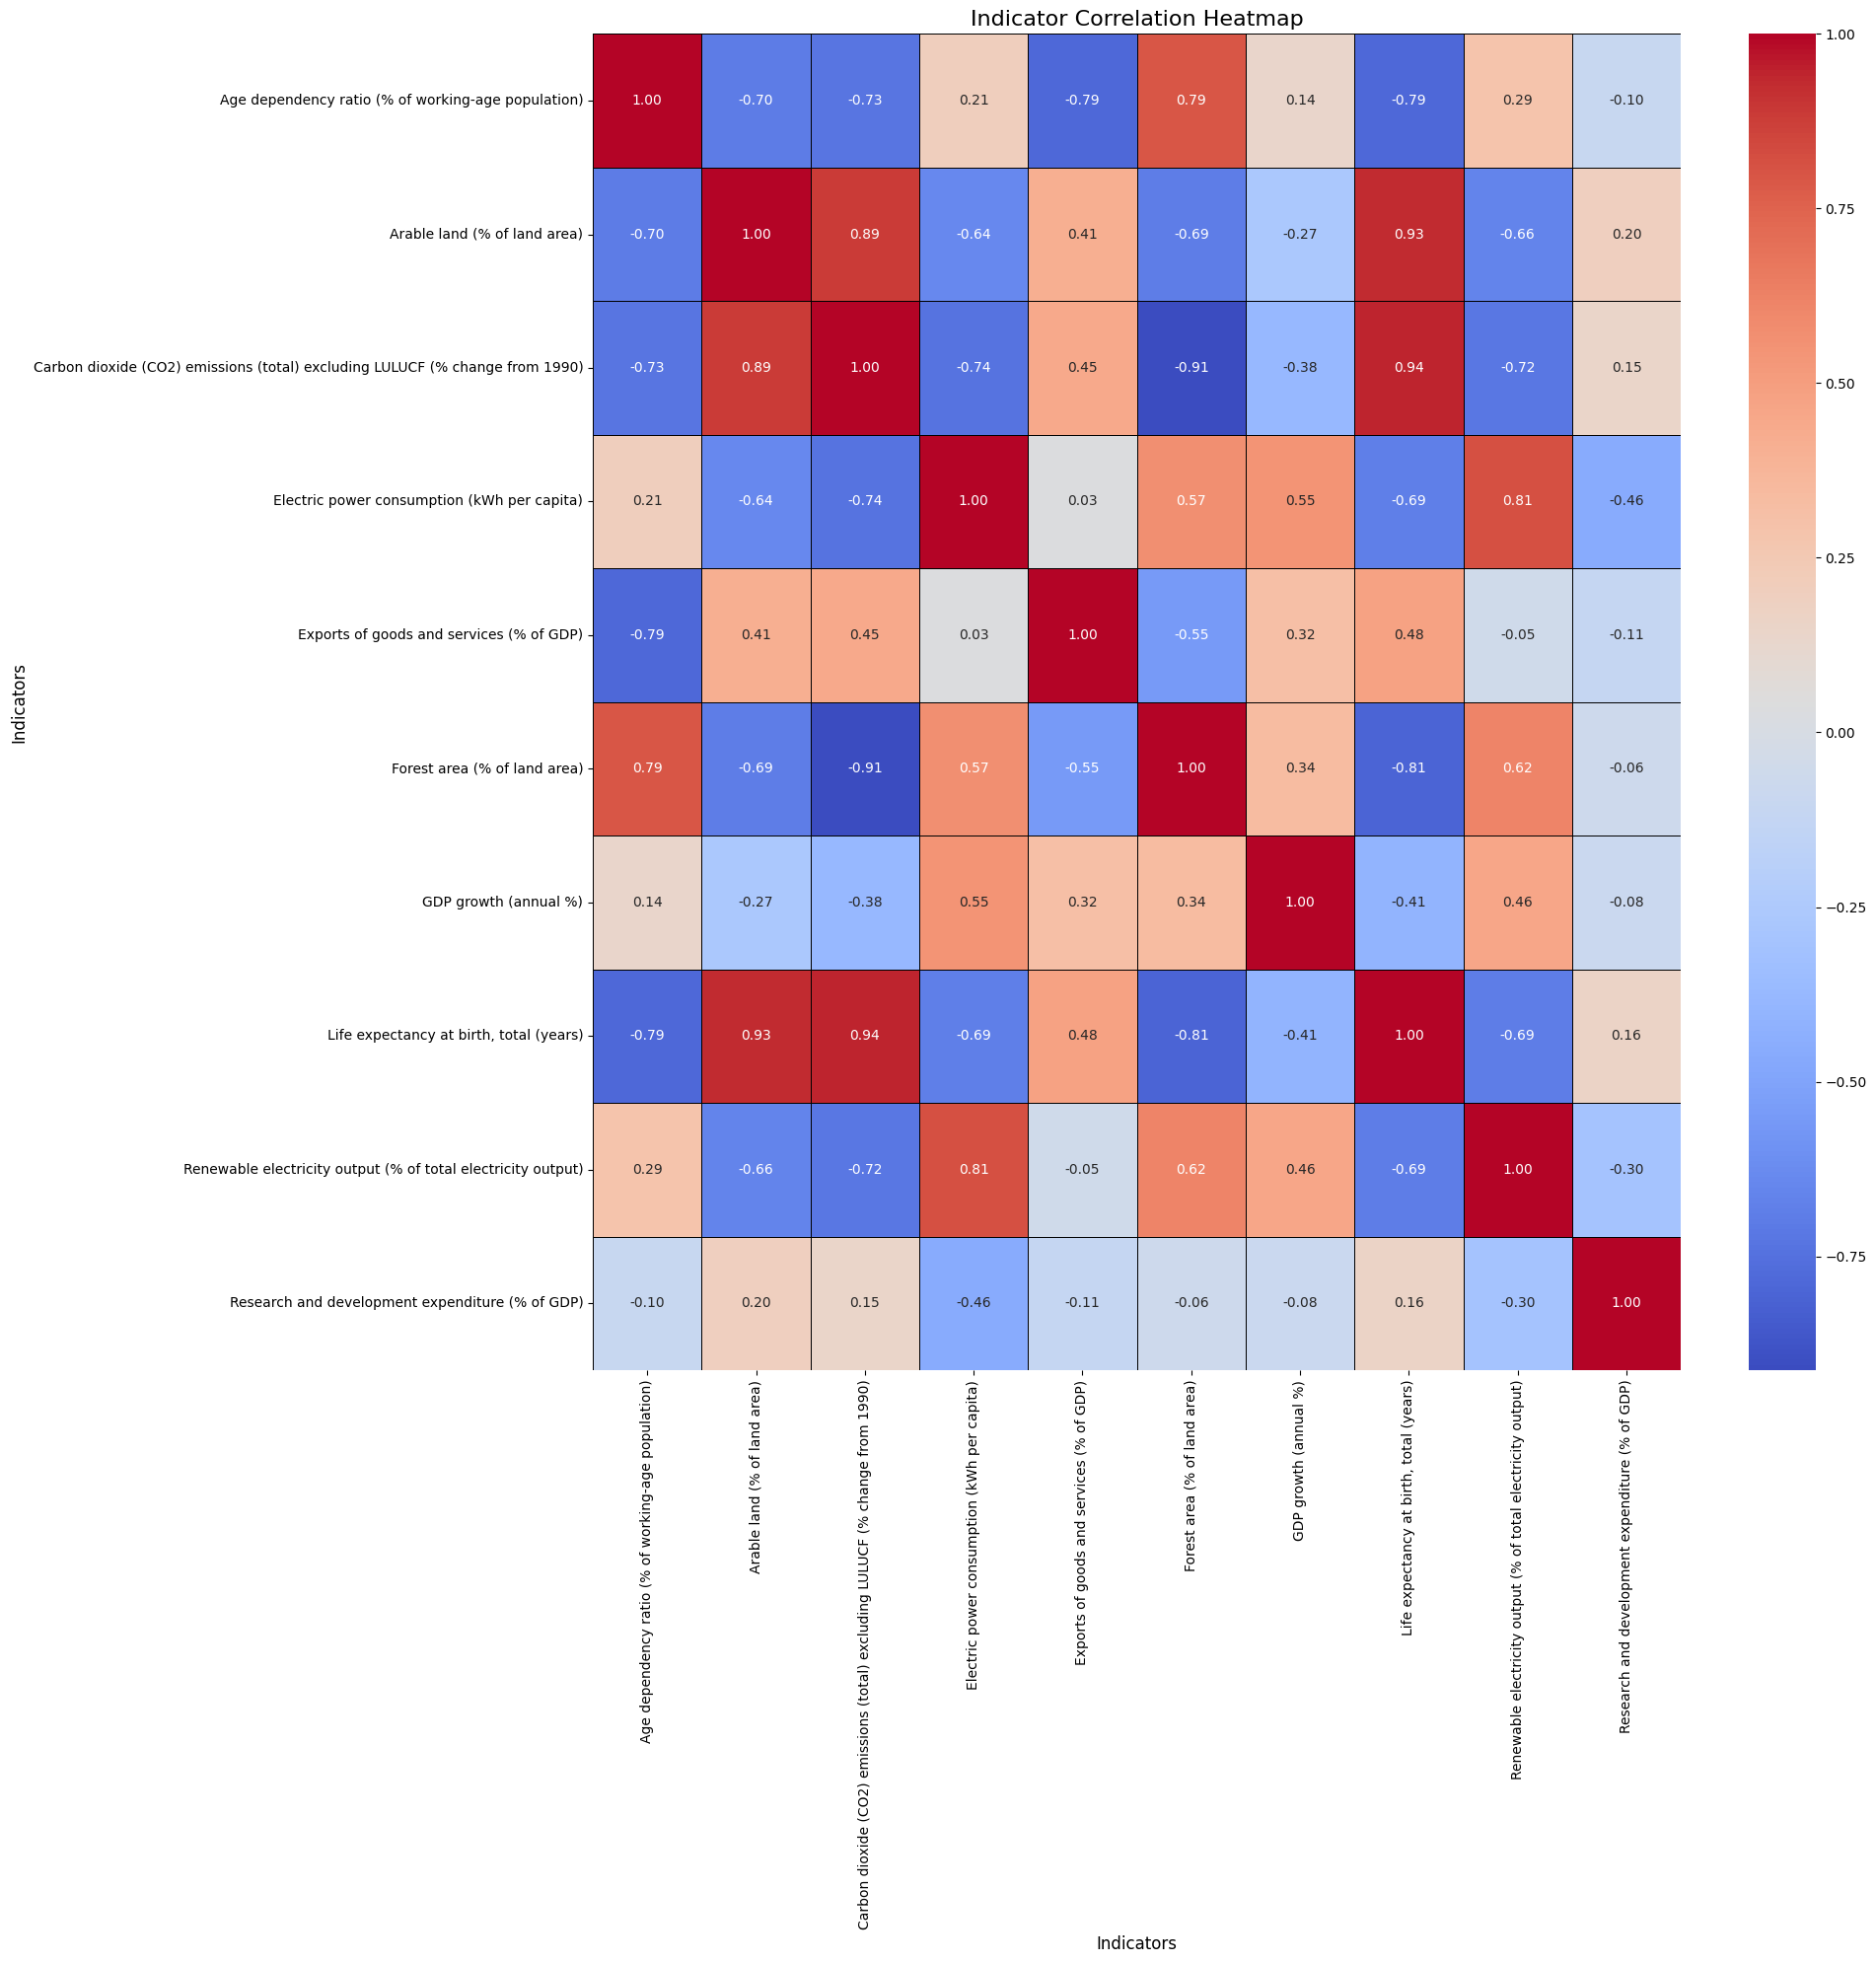

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

data = pd.read_csv('data_wdi_filtered.csv')
data.drop(columns=['Country Code', 'Indicator Code','Country Name','2023'], inplace=True)
data.drop(columns=[str(i) for i in range(1960,2000)], inplace=True)
print(data.columns)

data = data.groupby('Indicator Name').mean().reset_index()
print(data.shape)

indicator_names = data.iloc[:, 0].tolist()
data_numeric = data.iloc[:, 1:]

corr_matrix = data_numeric.T.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    annot=True,             
    fmt=".2f",              
    cmap='coolwarm',        
    linewidths=0.5,         
    linecolor='black',      
    xticklabels=indicator_names, 
    yticklabels=indicator_names  
)

plt.title("Indicator Correlation Heatmap", fontsize=16)
plt.xlabel("Indicators", fontsize=12)
plt.ylabel("Indicators", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlation_pairs = []
indicators = corr_matrix.index.tolist()
labels = indicator_names
labels[2] = 'CO2 Emissions (%change from 1990)'#excluding LULUCF 

for i in range(len(indicators)):
    print(f"{indicators[i]} : {labels[i]}")
    
print()

for i in range(len(indicators)):
    for j in range(i+1, len(indicators)):
        ind1 = indicators[i]
        ind2 = indicators[j]
        if ind1 in corr_matrix.index and ind2 in corr_matrix.columns:
             corr_value = corr_matrix.loc[ind1, ind2]
             correlation_pairs.append((ind1, ind2, corr_value))
        

corr_df = pd.DataFrame(correlation_pairs, columns=['Indicator 1', 'Indicator 2', 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)
top_positive = corr_df.head(5)
top_negative = corr_df.tail(5)

print("Top 5 Positive Correlations:")
print(top_positive)
print("\nTop 5 Negative Correlations:")
print(top_negative)

def plot_correlation_pair(ind1, ind2, corr_value, corr_type="Positive"):
    ind1_str = int(ind1)
    ind2_str = int(ind2)

    x = pd.to_numeric(data.loc[ind1], errors='coerce').values
    y = pd.to_numeric(data.loc[ind2], errors='coerce').values

    valid = ~(np.isnan(x) | np.isnan(y))
    x = x[valid]
    y = y[valid]

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, s=80, color='#38b6c1')

    if len(x) > 1:
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--', linewidth=2)

    plt.title(f"{corr_type} Correlation: {labels[ind1_str]} vs {labels[ind2_str]}\nCorrelation: {corr_value:.2f}", fontsize=14)
    plt.xlabel(labels[ind1_str], fontsize=12)
    plt.ylabel(labels[ind2_str], fontsize=12)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def util_plot(data,pn = 'p'):
    if pn == 'p':
        plot_correlation_pair(data['Indicator 1'], data['Indicator 2'], data['Correlation'], "Positive")
    else:
        plot_correlation_pair(data['Indicator 1'], data['Indicator 2'], data['Correlation'], "Negative")
        

0 : Age dependency ratio (% of working-age population)
1 : Arable land (% of land area)
2 : CO2 Emissions (%change from 1990)
3 : Electric power consumption (kWh per capita)
4 : Exports of goods and services (% of GDP)
5 : Forest area (% of land area)
6 : GDP growth (annual %)
7 : Life expectancy at birth, total (years)
8 : Renewable electricity output (% of total electricity output)
9 : Research and development expenditure (% of GDP)

Top 5 Positive Correlations:
    Indicator 1  Indicator 2  Correlation
21            2            7     0.943873
14            1            7     0.931494
9             1            2     0.886051
28            3            8     0.814677
4             0            5     0.792868

Top 5 Negative Correlations:
    Indicator 1  Indicator 2  Correlation
17            2            3    -0.738053
6             0            7    -0.787494
3             0            4    -0.789449
36            5            7    -0.807423
19            2            5    -0.9128

## Top 5 positive correlations

### CO₂ emissions vs Life Expectancy
Hypothesis - An increase in CO₂ emissions implies an increase in infrastructure and industrial growth. Better infrastructure means better healthcare facilities and better quality of life in general. Thus, it means an increased life expectancy at birth. But in the future, as CO₂ emissions increase, global warming will increase and quality of air will decrease. This will lead to an increase in health problems and thus reduce life expectancy.

Observation - We observe that there is a strong positive correlation between CO₂ emissions and life expectancy. This means that current data shows us only an increase in life expectancy as CO₂ emissions increase. Thus, we have not yet reached the point where an increase in CO₂ emissions have started to negatively affect life expectancy.

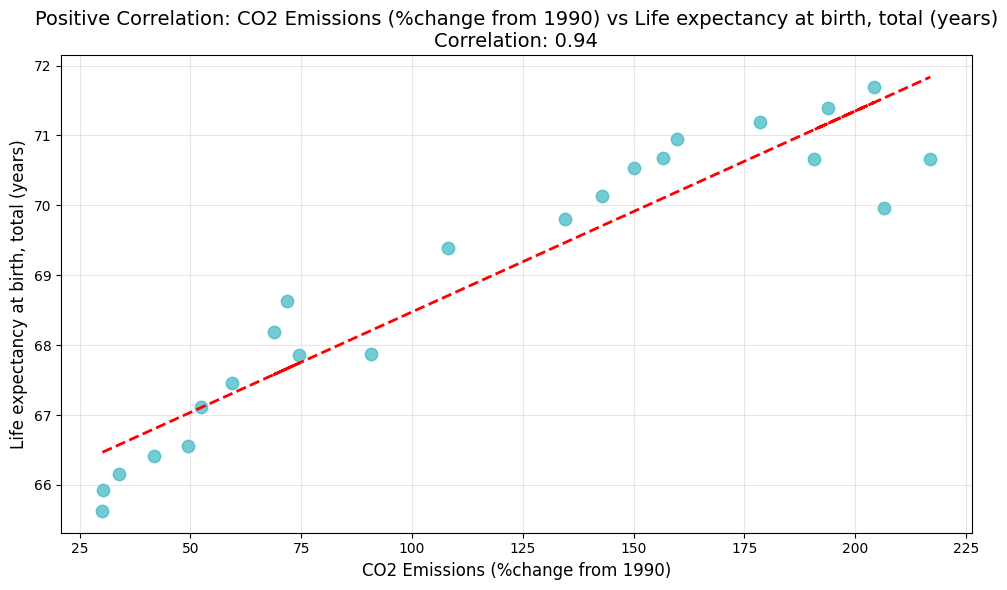

In [48]:
util_plot(top_positive.iloc[0], 'p')

### Arable Land vs Life Expectancy
Hypothesis: An increase in Arable Land is favourable for Life expectancy as arable land lets you have more agricultural products and employment.

Observation : From the plot, we see that countries with more arable land tend to have higher life expectancy and correlation between arable land and life expectancy is also high. As the percentage of arable land goes up, life expectancy also goes up. This strong positive link supports the idea that having more farmland can help people live longer, possibly because it leads to more food and better nutrition.

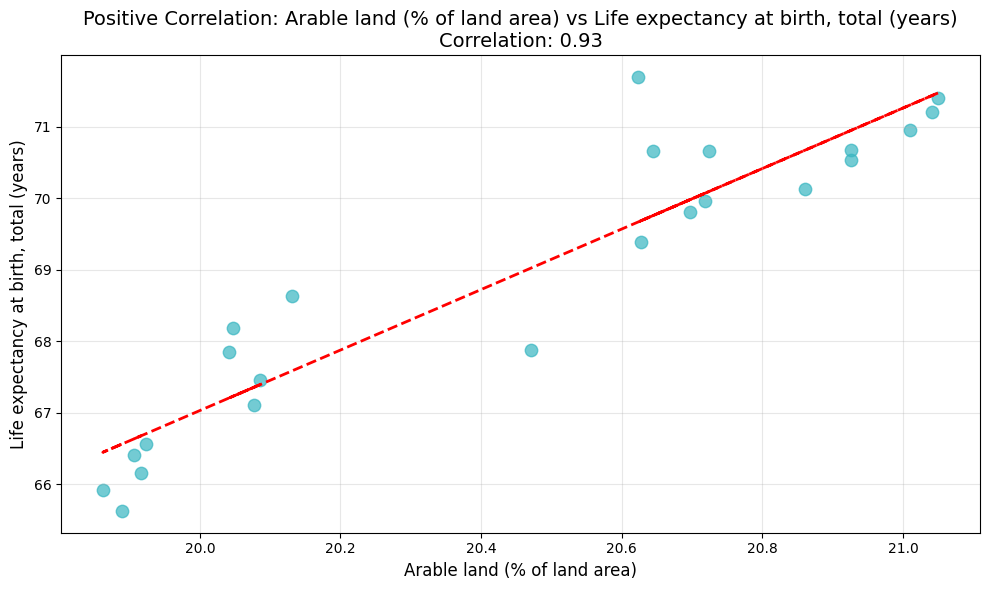

In [49]:
util_plot(top_positive.iloc[1], 'p')

### Arable land vs CO₂ emissions
Hypothesis - These two indicators are independent of each other. They are not related to each other in any way and thus we do not expect to conclude anything significant from the correlation between them.

Observation - We observe a strong correlation between arable land and CO₂ emissions. But, we know that correlation does not imply causation and since, these two indicators are independent of each other we cannot conclude much from this correlation value.


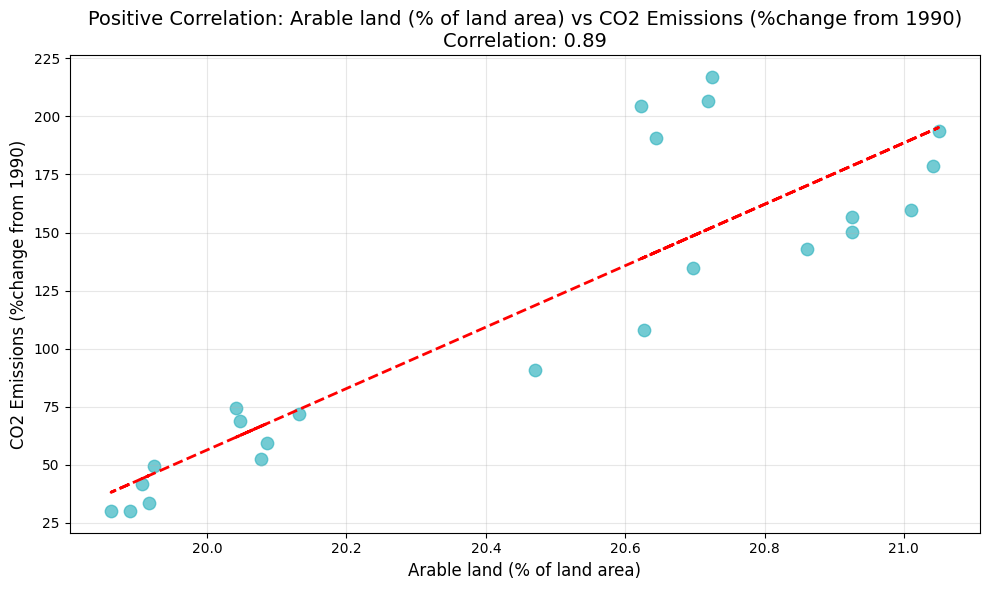

In [50]:
util_plot(top_positive.iloc[2], 'p')

### Electric Power Consumption vs Renewable Electricity Output
Hypothesis - As the power consumption of countries increases we are observing the negative effects of using non renewable sources of electricity. Thus, great effort is being put in to switch to renewable sources of energy.

Observation - We observe a positive correlation between electric power consumption and renewable energy output. This suggests that as the power consumption of countries is increasing, they are shifting to renewable sources of energy.


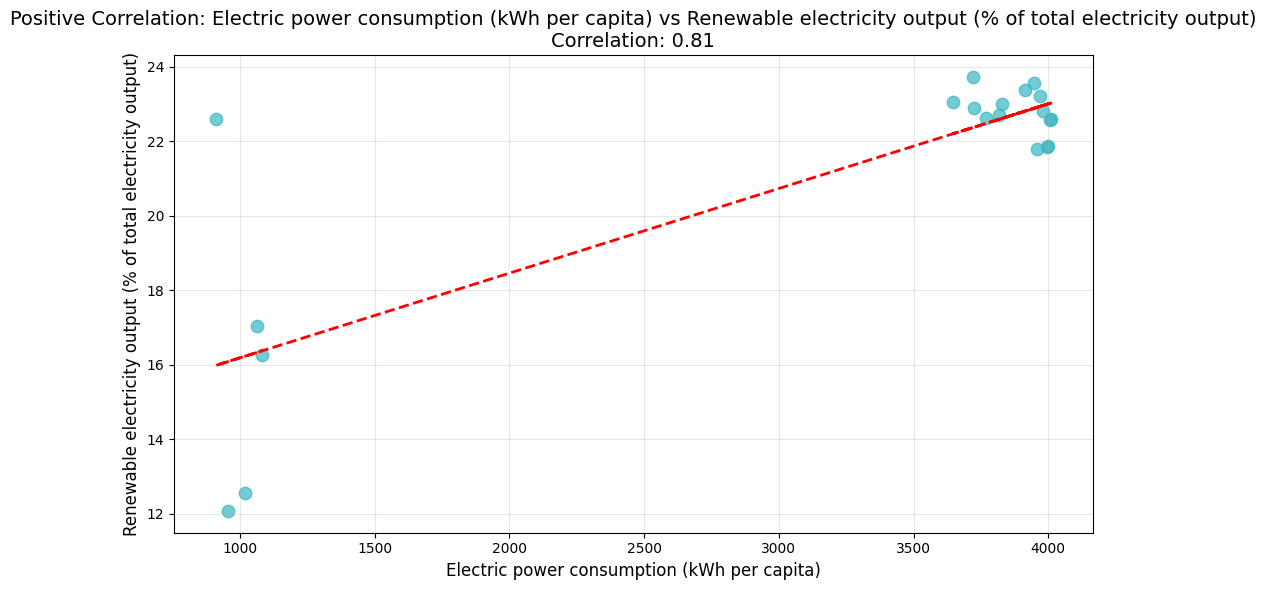

In [51]:
util_plot(top_positive.iloc[3], 'p')

### Age dependency vs Forest Area
Hypothesis : There should not be any causal relation between these two criteria. Because larger countries may have more forest area but they are developed like japan.
Observation : This may be an coincedence that correlation is high.

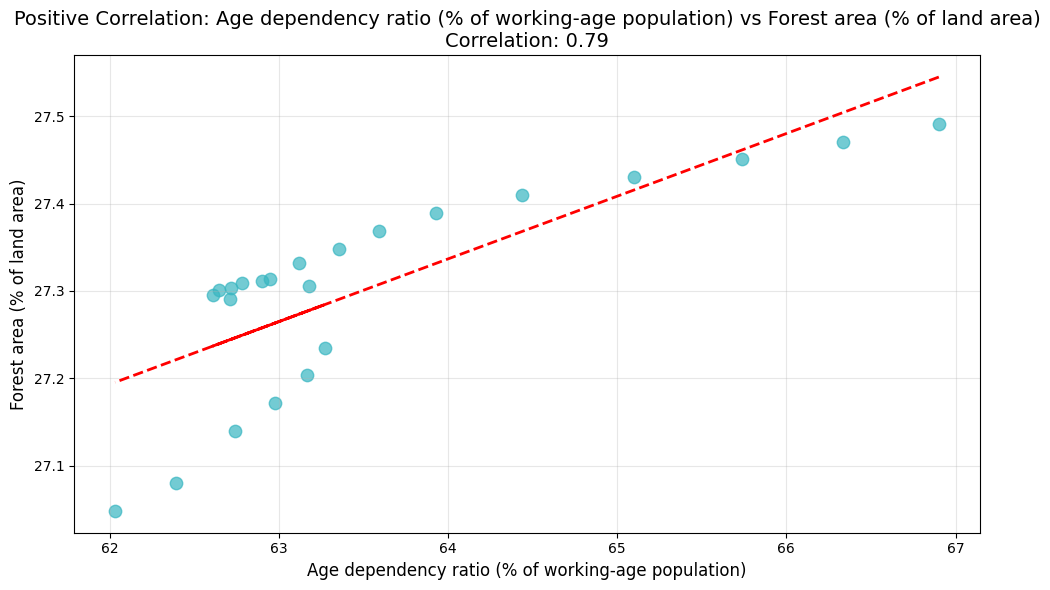

In [52]:
util_plot(top_positive.iloc[4], 'p')

## Top 5 negative correlations

### CO₂ emissions vs Power consumption:

Hypothesis – Higher power consumption typically reflects increased industrial activity, transportation, and energy use, much of which is still reliant on fossil fuels in many countries. This leads to greater combustion of coal, oil, and natural gas, directly contributing to higher CO₂ emissions. Therefore, as power consumption increases, CO₂ emissions are also expected to rise.

Observation – A negative correlation is observed between CO₂ emissions and power consumption. While this might seem counterintuitive, it highlights that correlation does not imply causation. Some countries with high power consumption may rely more on cleaner energy sources like nuclear, hydro, or renewables, which do not emit CO₂, thereby reducing emissions even as power usage increases.

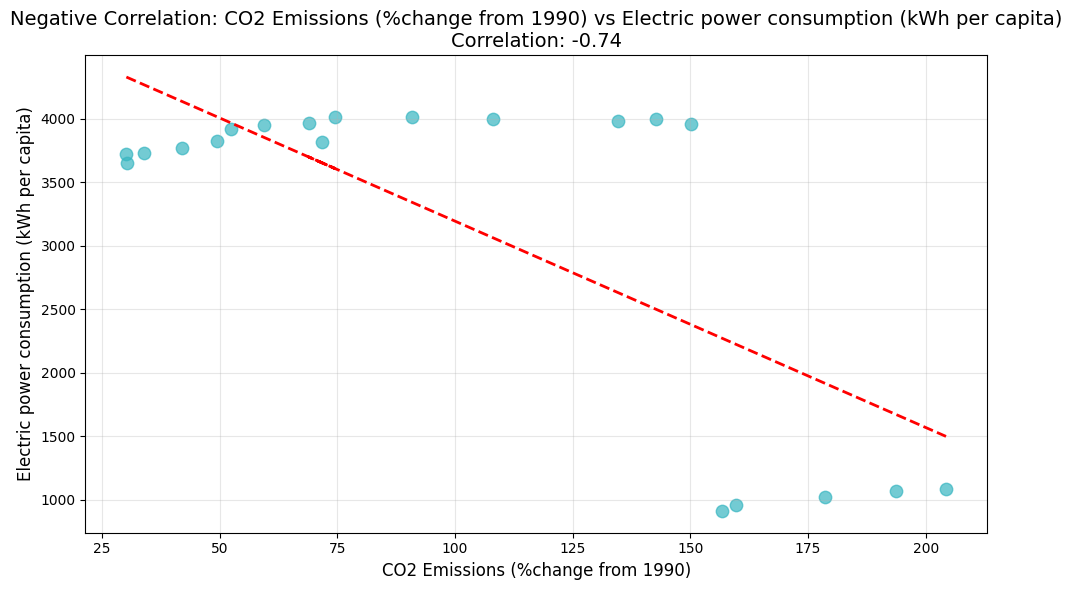

In [53]:
util_plot(top_negative.iloc[0], 'n')

#### Age dependency ratio vs Life expectancy:

Hypothesis – A higher age dependency ratio indicates a larger proportion of dependents relative to the working-age population. This can place economic and social pressure on healthcare systems, public infrastructure, and family resources. In regions where such support systems are overburdened, overall health outcomes may suffer, potentially leading to lower life expectancy.

Observation – A significant negative correlation is observed between age dependency ratio and life expectancy, suggesting that populations with a higher dependency burden tend to have shorter average lifespans.

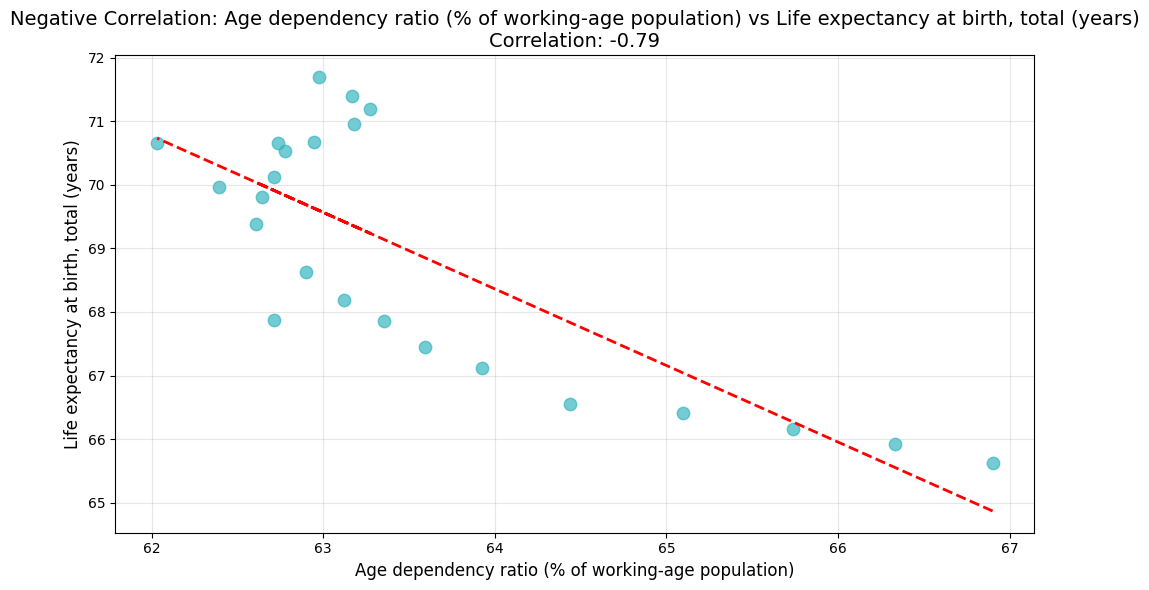

In [54]:
util_plot(top_negative.iloc[1], 'n')

#### Age dependency ratio vs Exports of goods and services:

Hypothesis – A high age dependency ratio can strain a country’s labor force and economic productivity. This could lead to reduced industrial output and international trade activity, including exports. Hence, countries with a higher age dependency ratio may tend to export less.

Observation – A clear negative correlation is observed between age dependency ratio and exports of goods and services, implying that as the dependency burden increases, export levels tend to decrease.

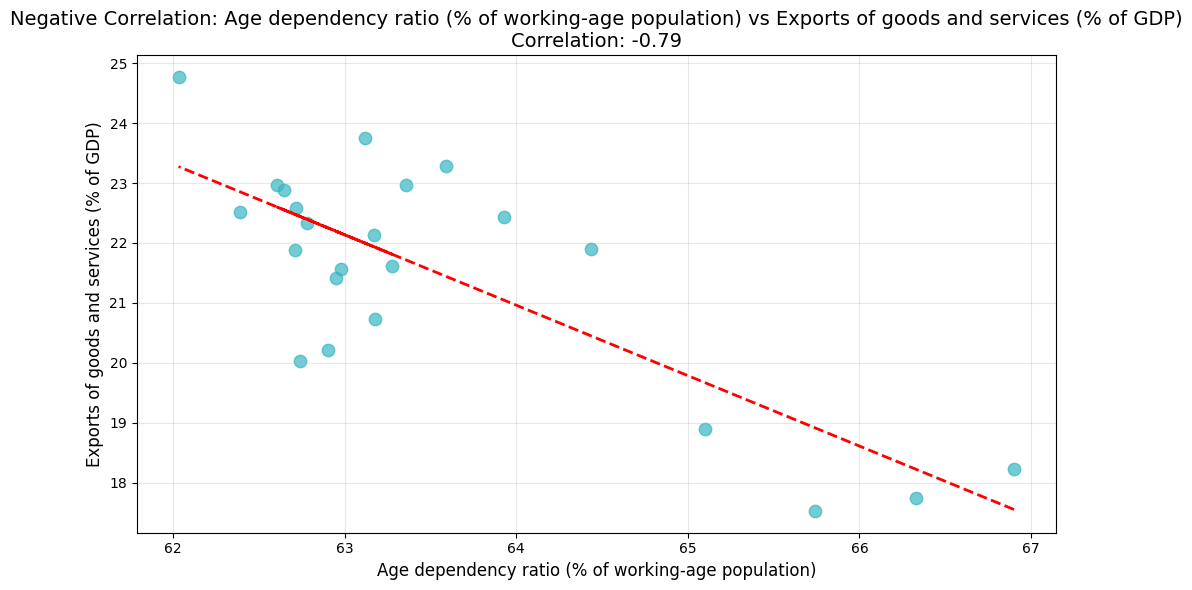

In [55]:
util_plot(top_negative.iloc[2], 'n')

#### Forest area vs Life expectancy:

Hypothesis – Greater forest coverage contributes to better air quality, reduced pollution, and improved environmental conditions. These factors positively impact public health, which can, in turn, contribute to longer life expectancy. Hence, a decrease in forest area may be associated with lower life expectancy.

Observation – A notable negative correlation exists between forest area and life expectancy. However, this does not necessarily imply a direct causal relationship. In some cases, countries with lower forest cover may have higher life expectancy due to advanced healthcare systems and urban development, suggesting that other socioeconomic factors may be influencing the outcome.

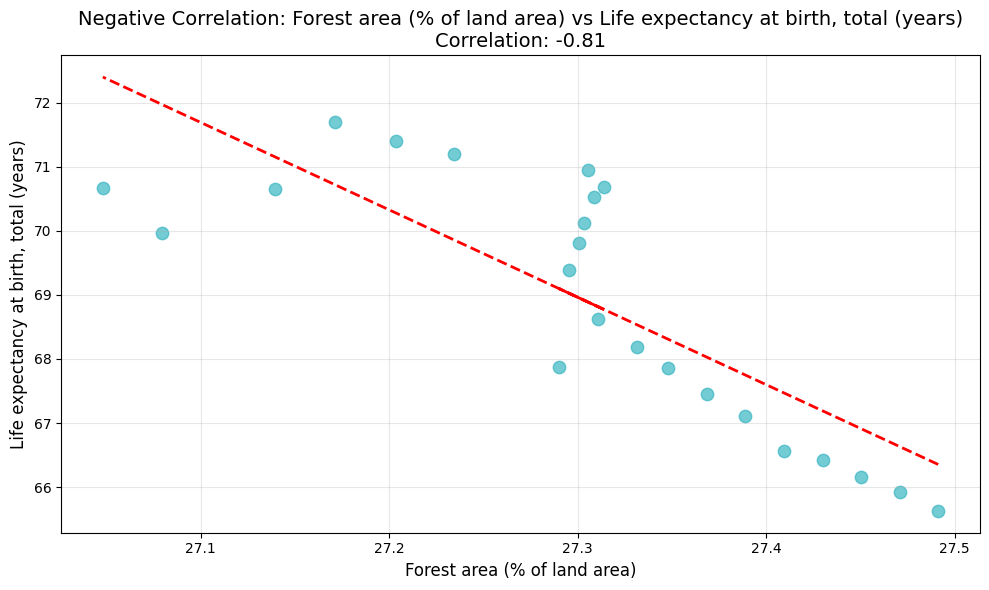

In [56]:
util_plot(top_negative.iloc[3], 'n')

#### CO₂ emissions vs Forest area:

Hypothesis – Forests act as natural carbon sinks, absorbing CO₂ from the atmosphere. Therefore, a decline in forest area would reduce this absorption capacity, potentially leading to higher atmospheric CO₂ levels. Thus, CO₂ emissions are expected to rise as forest area decreases.

Observation – There is a strong negative correlation between these two indicators, indicating that regions with less forest cover tend to have higher CO₂ emissions.

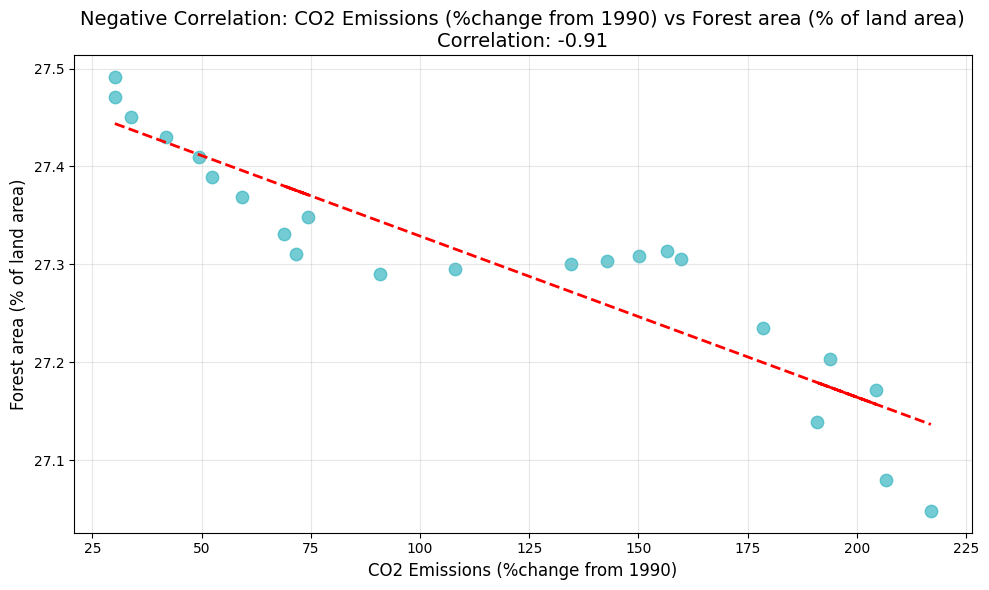

In [57]:
util_plot(top_negative.iloc[4], 'n')